In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn import preprocessing

In [ ]:
!wget http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz

In [ ]:
!tar xvzf 20news-bydate.tar.gz

In [ ]:
!ls -lia

total 14152
5242898 drwxr-xr-x  1 root root     4096 Mar 15 23:20 .
5374057 drwxr-xr-x  1 root root     4096 Mar 15 23:19 ..
5374127 -rw-r--r--  1 root root 14464277 Sep 22  2014 20news-bydate.tar.gz
5374064 drwxr-xr-x 22 6602 6602     4096 Mar 18  2003 20news-bydate-test
5381662 drwxr-xr-x 22 6602 6602     4096 Mar 18  2003 20news-bydate-train
3145745 drwxr-xr-x  4 root root     4096 Mar  5 14:36 .config
5242899 drwxr-xr-x  1 root root     4096 Mar  5 14:37 sample_data


In [ ]:
traindata = []
trainpath = './20news-bydate-train/'
listdir = os.listdir(trainpath)
for dirname in listdir:
  listfiles = os.listdir(trainpath + dirname)
  for filename in listfiles:
    with open(trainpath + dirname+'/' + filename,'r', errors = 'ignore') as trainfile:
      text = trainfile.read()
    tup = (dirname, filename, text)
    traindata.append(tup)

dftrain = pd.DataFrame(traindata, columns = ['category', 'filename', 'text'])
dftrain.head()

NameError: ignored

In [ ]:
testdata = []
testpath = './20news-bydate-test/'
listdir = os.listdir(testpath)
for dirname in listdir:
  listfiles = os.listdir(testpath + dirname)
  for filename in listfiles:
    with open(testpath + dirname+'/' + filename,'r', errors = 'ignore') as testfile:
      text = testfile.read()
    tup = (dirname, filename, text)
    testdata.append(tup)

dftest = pd.DataFrame(testdata, columns = ['category', 'filename', 'text'])
dftest.head()

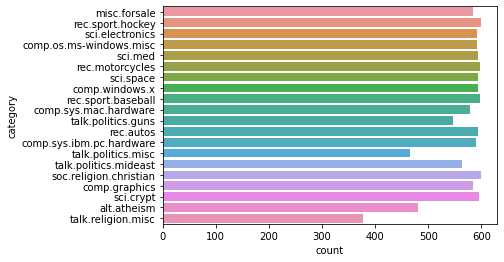

In [ ]:
traindis = sns.countplot(y = "category", data=dftrain)

In [ ]:
X_train = dftrain['text'].values
y_train = dftrain['category'].values
X_test = dftest['text'].values
y_test = dftest['category'].values

Multinomial Naive Bayes

In [ ]:
import re
import string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): 
    return re_tok.sub(r' \1 ', s).split()

In [ ]:
import re
re_tok = re.compile('[^a-zA-Z]')
def tokenize(s): 
    return re_tok.sub(' ', s).split()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
X_train_cv = vect.fit_transform(X_train) 
X_test_cv = vect.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB().fit(X_train_cv, y_train)

In [ ]:
probs = nbmodel.predict_proba(X_test_cv)[:,1]
probs

array([1.03998946e-138, 4.04248134e-043, 1.15194562e-013, ...,
       2.00623668e-069, 9.90011439e-026, 1.89682863e-054])

In [ ]:
nbpredictions = nbmodel.predict(X_test_cv)
nbpredictions

array(['sci.electronics', 'misc.forsale', 'misc.forsale', ...,
       'talk.politics.guns', 'talk.religion.misc',
       'soc.religion.christian'], dtype='<U24')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,roc_curve, auc

In [ ]:
accuracy = accuracy_score(y_test, nbpredictions)
print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")


nbcm = confusion_matrix(y_test, nbpredictions)
print(f"Confusion matrix.:\n {nbcm}")



Accuracy.........: 77.2836
Confusion matrix.:
 [[245   0   0   1   0   1   0   0   1   0   2   1   1   2   2  41   2  11
    5   4]
 [  1 287   0  12   4  31   1   0   0   1   0  26   5   2   8   2   2   1
    6   0]
 [  2  55   1 134  13 112   2   0   1   3   1  31   4   4   8   5   2   1
   14   1]
 [  0  11   1 300  15  11   3   5   0   0   1  11  23   0   5   0   1   2
    3   0]
 [  0  12   1  22 289   5   3   5   1   1   0  14  10   3   3   1   4   2
    9   0]
 [  1  25   2  11   1 332   0   0   0   0   0  13   0   2   4   1   2   1
    0   0]
 [  0   6   0  35  17   3 253  16   4   1   4   6  16   7   6   2   5   4
    5   0]
 [  0   1   0   2   0   0   4 360   3   2   2   3   0   0   4   0   4   2
    9   0]
 [  0   0   0   1   0   0   2  13 365   0   0   4   0   0   0   1   3   4
    5   0]
 [  1   1   0   0   1   1   0   6   0 345  16   0   0   0   5   6   2   2
   11   0]
 [  0   0   0   0   0   0   0   0   0   2 385   1   0   1   1   3   1   2
    3   0]
 [  0   3   0   

Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean= False)
scaler.fit(X_train_cv)
tf_train = scaler.transform(X_train_cv)
tf_test = scaler.transform(X_test_cv)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',verbose=2,n_jobs = -1).fit(tf_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   58.0s finished


In [ ]:
lgprobs = lgmodel.predict_proba(tf_test)[:,1]
lgprobs

array([2.35783746e-09, 1.49704070e-05, 1.58093062e-02, ...,
       1.64920406e-02, 1.17700279e-06, 2.54809206e-05])

In [ ]:
lgpredictions = lgmodel.predict(tf_test)
lgpredictions

array(['sci.electronics', 'misc.forsale', 'misc.forsale', ...,
       'soc.religion.christian', 'talk.religion.misc',
       'talk.religion.misc'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,roc_curve, auc

In [ ]:
lgaccuracy = accuracy_score(y_test, lgpredictions)


print("\n")
print(f"Accuracy.........: {lgaccuracy * 100.0:.4f}")


lgcm = confusion_matrix(y_test, lgpredictions)
print(f"Confusion matrix.:\n {lgcm}")



Accuracy.........: 76.7658
Confusion matrix.:
 [[243   0   0   6   3   1   0   0   0   2   0   2   2   7   6  14   2   4
    1  26]
 [  1 245  25  22   6  27  14   5   2   6   4   8  13   1   5   4   1   0
    0   0]
 [  0  18 235  46  13  27  11   4   1   6   3  15   4   3   3   3   1   0
    0   1]
 [  0  21  26 251  16   7  20   5   3   4   0   1  25   2   6   0   3   0
    0   2]
 [  0  11  12  16 287   4  26   6   0   5   0   1  11   0   3   0   1   1
    1   0]
 [  0  35  20  17   6 274   9   3   6   4   2   8   5   1   3   0   1   0
    1   0]
 [  0   6   8  17  11   2 310   9   1   4   3   0   8   3   2   4   2   0
    0   0]
 [  0   6   5   6   7   2  12 331   7   1   1   1   9   1   3   1   1   1
    1   0]
 [  0   1   1   2   2   1   6   6 369   1   1   1   4   0   0   2   1   0
    0   0]
 [  0   2   0   4   2   0   3   1   0 362   8   2   2   0   3   2   1   5
    0   0]
 [  0   4   4   0   3   2   2   0   2   9 362   2   1   1   1   3   0   0
    1   2]
 [  2   5   2   

SVM With Linear Kernel

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
svmmodel = SVC(kernel='linear', C=1E10)
svmmodel.fit(X_train_cv, y_train)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
svmmodel.support_vectors_

<7547x130093 sparse matrix of type '<class 'numpy.float64'>'
	with 966109 stored elements in Compressed Sparse Row format>

In [ ]:
svmpredictions = svmmodel.predict(X_test_cv)

In [ ]:
svmaccuracy = accuracy_score(y_test,svmpredictions)
print("\n")
print(f"Accuracy.........: {svmaccuracy * 100.0:.4f}")


svmcm = confusion_matrix(y_test, svmpredictions)
print(f"Confusion matrix.:\n {svmcm}")



Accuracy.........: 73.3006
Confusion matrix.:
 [[218   4   0   1   5   1   1   1   2   1   1   4   1  10   1  15   4   6
    1  42]
 [  3 278  13  11   9  19   3   3   1  10   2  10  12   8   2   0   1   0
    2   2]
 [  4  30 252  42  12  13   1   6   2   3   1   5   3   7   0   1   6   1
    3   2]
 [  3  15  28 254  33   5   9   8   2   1   0   3  26   1   0   0   2   1
    0   1]
 [  1   6  10  29 273   1  11   4   6   9   1   2  20   4   2   0   1   0
    4   1]
 [  2  46  40   9   5 261   4   1   1   1   0   8   8   4   2   2   1   0
    0   0]
 [  1   5   3  15   5   2 332   9   3   1   4   0   7   1   1   1   0   0
    0   0]
 [  0   5   1   4   4   1  11 313  15   6   0   2  15  12   0   2   3   0
    2   0]
 [  0   3   0   0   0   0   6  19 340   2   0   0   6   8   1   3   2   2
    3   3]
 [ 12   3   1   2   3   2   5   8   2 303  22   5   4   7   1   2   4   1
    3   7]
 [  3   1   0   4   4   2   4   5   2  24 340   1   1   1   0   0   3   3
    1   0]
 [  0   2   4   

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, 
                    n_estimators=600, 
                    objective='binary:logistic',
                    silent=True, 
                    nthread=1)

Tune Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
penalty = ['l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train_cv, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_cv, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
